In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding = 'latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# 1 Data Cleaning 
# 2 EDA
# 3 Text preprocessing
# 4 model building
# 5 Evaluating
# 6 Improvement
# 7 website
# 8 deploy

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# we will drop last 3 columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename the columns
df.rename(columns = {'v1': 'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
210,ham,"What's up bruv, hope you had a great break. Do..."
1305,ham,Designation is software developer and may be s...
3116,ham,Now am free call me pa.
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."
4260,ham,Pls dont forget to study


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep = 'last')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2. EDA

In [15]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

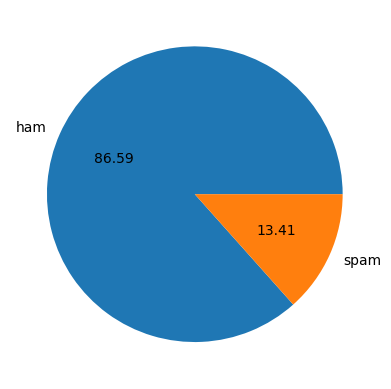

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)

In [19]:
df['num_word'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [20]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters', 'num_word', 'num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.501256,1.991565
std,59.690841,13.637056,1.501427
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,219.000000,38.000000


In [23]:
#ham
df[df['target'] == 0][['num_characters', 'num_word', 'num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.076062,1.832332
std,58.016023,13.875446,1.431214
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [24]:
#spam
df[df['target'] == 1][['num_characters', 'num_word', 'num_sentences']].describe()

,num_characters,num_word,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.706827,3.020080
std,29.183082,6.768560,1.538034
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [25]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

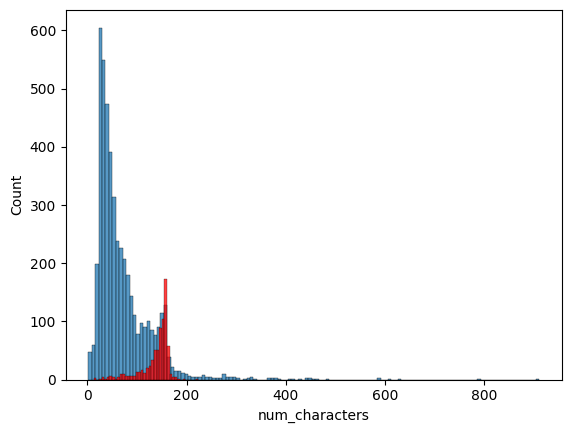

In [26]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_word', ylabel='Count'>

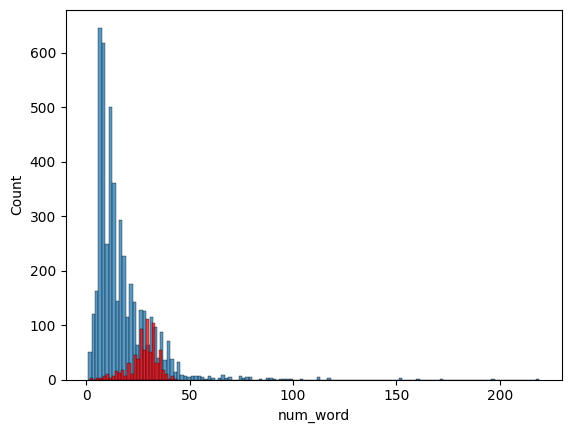

In [27]:
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'], color = 'red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


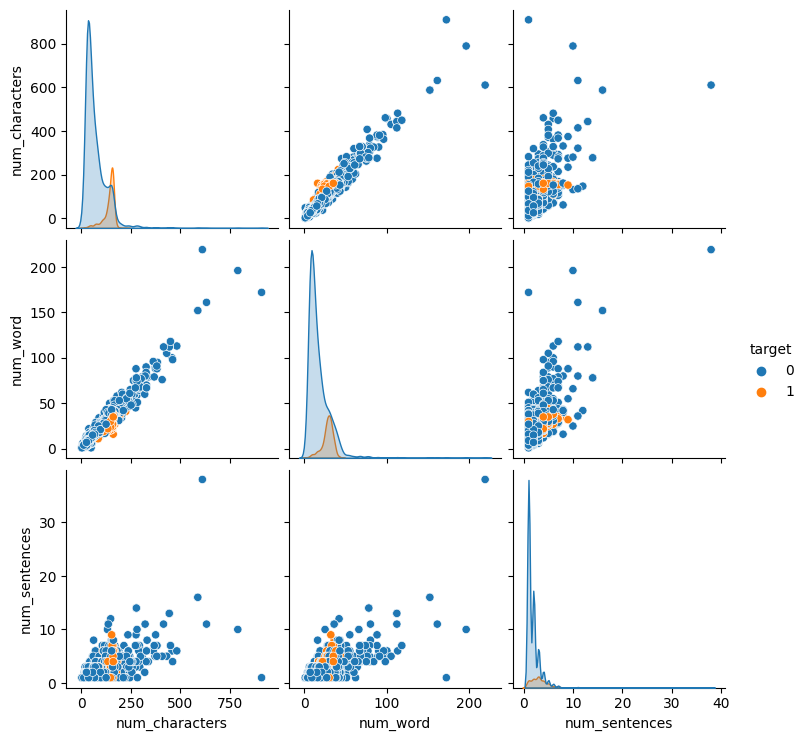

In [28]:
sns.pairplot(df, hue = 'target')

In [29]:
df[['num_characters', 'num_word', 'num_sentences']].corr()

,num_characters,num_word,num_sentences
num_characters,1.000000,0.965729,0.633082
num_word,0.965729,1.000000,0.688297
num_sentences,0.633082,0.688297,1.000000


In [30]:
df.corr

<bound method DataFrame.corr of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_word  num_sentences  
0                111        23              2  
1                 29         8              2  
2                15

## 3. Data Preprocessing
* Lower case
* Tokenizetion
* Removing Special characters
* Removing stop words and punctuation
* stemming

In [31]:
from nltk.corpus import stopwords
import string
string.punctuation
# stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


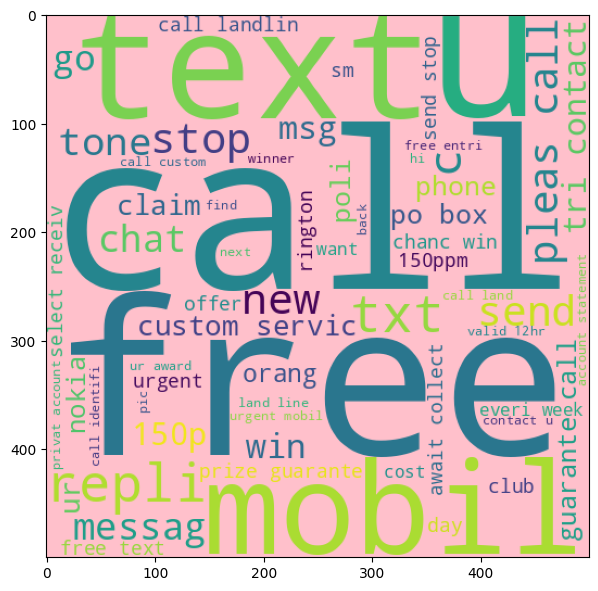

In [35]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'pink')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize = (7, 8))
plt.imshow(spam_wc)

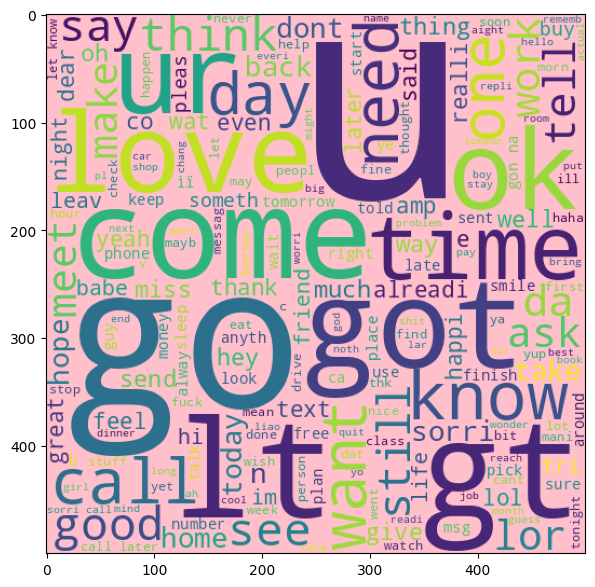

In [36]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize = (8, 7))
plt.imshow(ham_wc)

In [37]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

11424

In [39]:
from collections import Counter

In [40]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,217
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,claim,115
9,stop,114


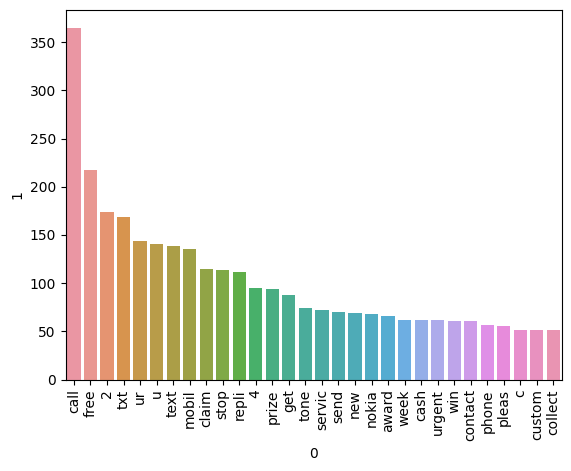

In [41]:
spam_counter = Counter(spam_corpus)

# Convert Counter object to DataFrame
d = pd.DataFrame(spam_counter.most_common(30), columns=['0', '1'])

# Create a bar plot
sns.barplot(x='0', y='1', data=d)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)
            

37417

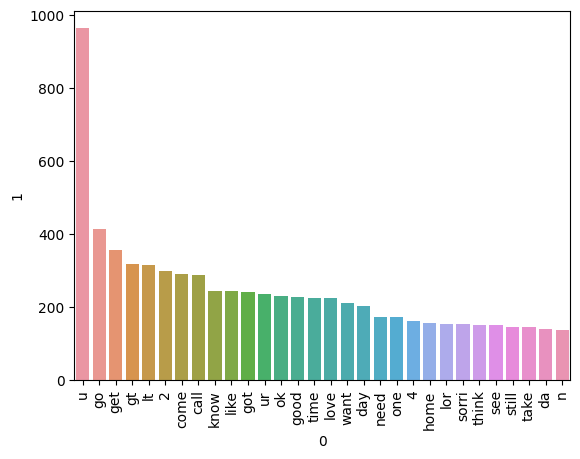

In [43]:
ham_counter = Counter(ham_corpus)

# Convert Counter object to DataFrame
p = pd.DataFrame(ham_counter.most_common(30), columns=['0', '1'])

# Create a bar plot
sns.barplot(x='0', y='1', data=p)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)  #<--max_features = 3000
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [104]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(x)

In [105]:
x.shape

(5572, 3000)

In [106]:
y = df['target'].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [109]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [110]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(X_train,y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.862780269058296
[[835 122]
 [ 31 127]]
0.5100401606425703


In [112]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9641255605381166
[[956   1]
 [ 39 119]]
0.9916666666666667


In [113]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9766816143497757
[[955   2]
 [ 24 134]]
0.9852941176470589


In [114]:
#tfidf, mnb

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [116]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [117]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [118]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [119]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9721973094170404, 0.9774436090225563)

In [120]:
my_accuracy_scores = []
my_precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    my_accuracy_scores.append(current_accuracy)
    my_precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9721973094170404
Precision -  0.9774436090225563
For  KN
Accuracy -  0.9040358744394619
Precision -  1.0
For  NB
Accuracy -  0.9641255605381166
Precision -  0.9916666666666667
For  DT
Accuracy -  0.9219730941704036
Precision -  0.8736842105263158
For  LR
Accuracy -  0.9515695067264573
Precision -  0.956140350877193
For  RF
Accuracy -  0.9730941704035875
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632286995515695
Precision -  0.9606299212598425
For  BgC
Accuracy -  0.9623318385650225
Precision -  0.9393939393939394
For  ETC
Accuracy -  0.9704035874439462
Precision -  0.9921259842519685
For  GBDT
Accuracy -  0.9417040358744395
Precision -  0.9345794392523364
For  xgb
Accuracy -  0.9641255605381166
Precision -  0.9836065573770492


In [121]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':my_accuracy_scores,'Precision':my_precision_scores}).sort_values('Precision', ascending = False)


In [122]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904036,1.000000
5,RF,0.973094,1.000000
8,ETC,0.970404,0.992126
2,NB,0.964126,0.991667
10,xgb,0.964126,0.983607
0,SVC,0.972197,0.977444
6,AdaBoost,0.963229,0.960630
4,LR,0.951570,0.956140
7,BgC,0.962332,0.939394
9,GBDT,0.941704,0.934579


In [123]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904036
1,RF,Accuracy,0.973094
2,ETC,Accuracy,0.970404
3,NB,Accuracy,0.964126
4,xgb,Accuracy,0.964126
5,SVC,Accuracy,0.972197
6,AdaBoost,Accuracy,0.963229
7,LR,Accuracy,0.951570
8,BgC,Accuracy,0.962332
9,GBDT,Accuracy,0.941704


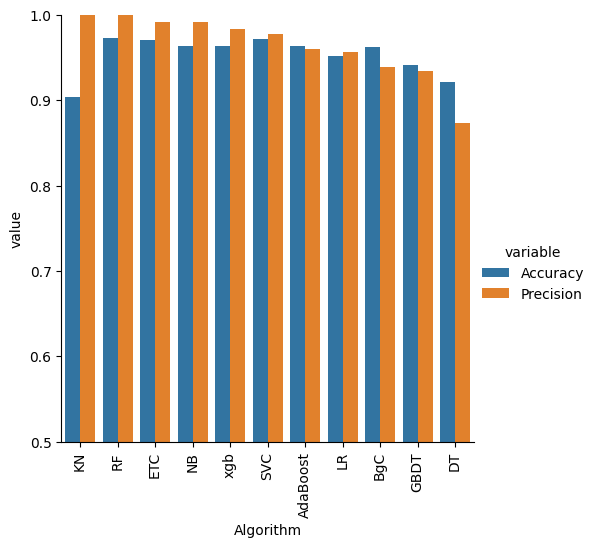

In [124]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [125]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [126]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))